In [2]:
import os
import sys
sys.path.append('.')

import matplotlib.pyplot as plt
import numpy as np

from kf_book.book_plots import plot_errorbars
import kf_book.book_plots as book_plots

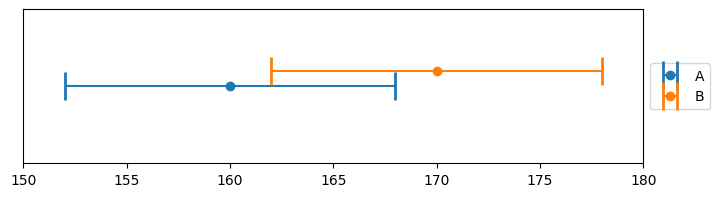

In [3]:
plot_errorbars([(160, 8, 'A'), (170, 8, 'B')], xlims=(150, 180))

In [4]:
import numpy as np
measurements = np.random.uniform(160, 170, size=10000)
means = measurements.mean()
print(f"Average of measurement :{means}")

measurements = np.random.normal(165, 5, size=10000)
means = measurements.mean()
print(f"Average of measurement :{means}")

Average of measurement :164.97237389683798
Average of measurement :164.97116829318887


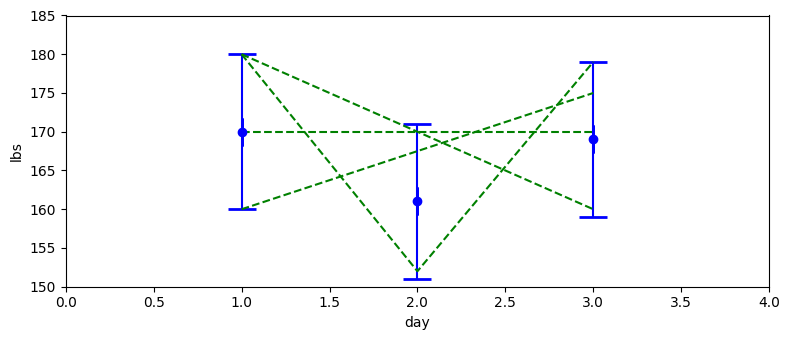

In [5]:
import kf_book.gh_internal as gh
gh.plot_hypothesis1()

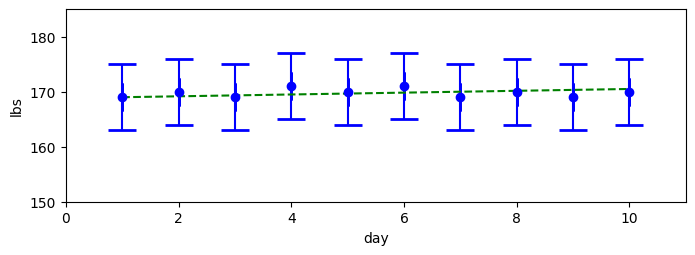

In [6]:
gh.plot_hypothesis2()

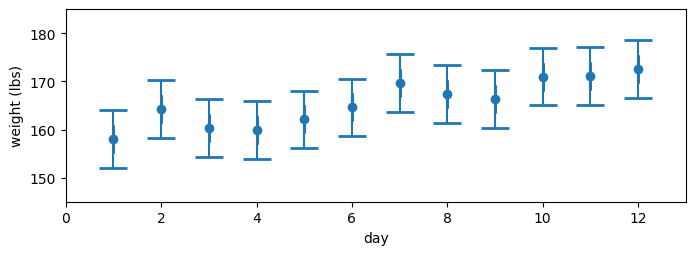

In [7]:
gh.plot_hypothesis3()

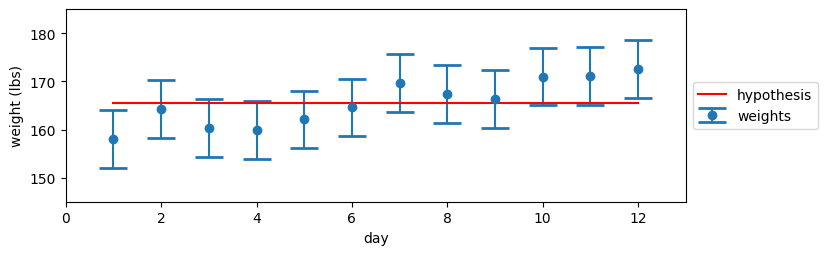

In [8]:
gh.plot_hypothesis4()

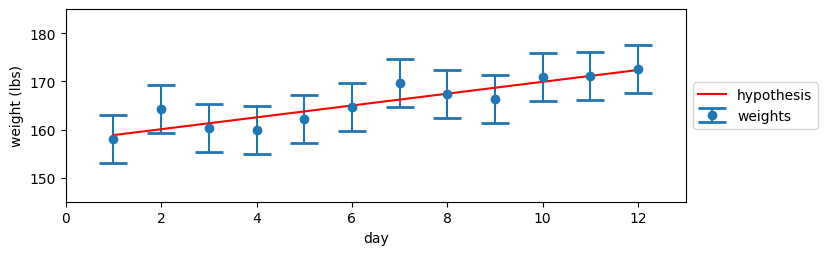

In [9]:
gh.plot_hypothesis5()

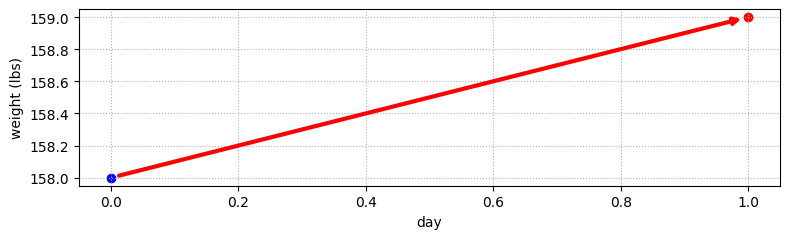

In [10]:
gh.plot_estimate_chart_1()

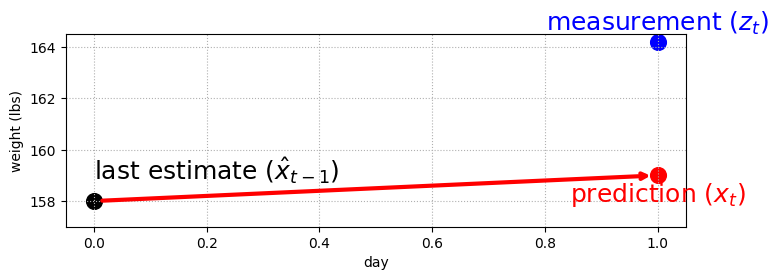

In [11]:
gh.plot_estimate_chart_2()

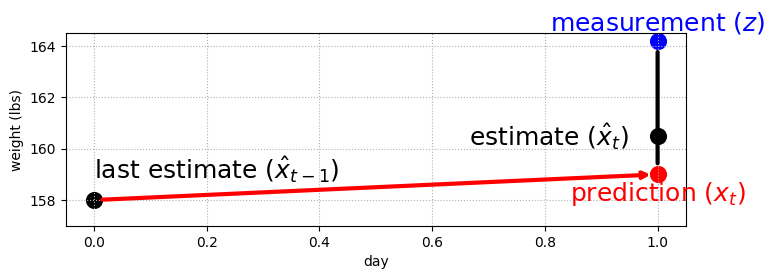

In [12]:
gh.plot_estimate_chart_3()

In [13]:
from kf_book.book_plots import figsize

weights = [158.0, 164.2, 160.3, 159.9, 162.1, 164.6,
           169.6, 167.4, 166.4, 171.0, 171.2, 172.6]

time_step = 1 # day
scale_factor = 4.0/10

def predict_using_gain_guess(estimated_weight, gain_rate, do_print=False):
    # Storage for the filterd result
    estimates, predictions = [estimated_weight], []

    # most filter use 'z' for measurements
    for z in weights:
        # predict new postion
        predicted_weight = estimated_weight + gain_rate*time_step

        # update filter
        estimated_weight = predicted_weight + scale_factor*(z - predicted_weight)

        # save and log
        estimates.append(estimated_weight)
        predictions.append(predicted_weight)
        if do_print:
            gh.print_results(estimates, predicted_weight, estimated_weight)
    return estimates, predictions

In [14]:
inital_estimate = 160.0
estimates, predictions = predict_using_gain_guess(estimated_weight=inital_estimate, gain_rate=1.0, do_print=True)

previous estimate: 160.00, prediction: 161.00, estimate 159.80
previous estimate: 159.80, prediction: 160.80, estimate 162.16
previous estimate: 162.16, prediction: 163.16, estimate 162.02
previous estimate: 162.02, prediction: 163.02, estimate 161.77
previous estimate: 161.77, prediction: 162.77, estimate 162.50
previous estimate: 162.50, prediction: 163.50, estimate 163.94
previous estimate: 163.94, prediction: 164.94, estimate 166.80
previous estimate: 166.80, prediction: 167.80, estimate 167.64
previous estimate: 167.64, prediction: 168.64, estimate 167.75
previous estimate: 167.75, prediction: 168.75, estimate 169.65
previous estimate: 169.65, prediction: 170.65, estimate 170.87
previous estimate: 170.87, prediction: 171.87, estimate 172.16


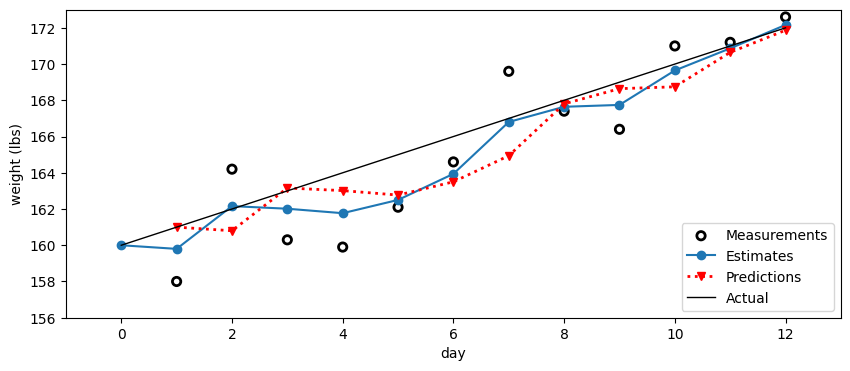

In [15]:
book_plots.set_figsize(10)
gh.plot_gh_results(weights, estimates, predictions, [160, 172])

previous estimate: 160.00, prediction: 159.00, estimate 158.60
previous estimate: 158.60, prediction: 157.60, estimate 160.24
previous estimate: 160.24, prediction: 159.24, estimate 159.66
previous estimate: 159.66, prediction: 158.66, estimate 159.16
previous estimate: 159.16, prediction: 158.16, estimate 159.74
previous estimate: 159.74, prediction: 158.74, estimate 161.08
previous estimate: 161.08, prediction: 160.08, estimate 163.89
previous estimate: 163.89, prediction: 162.89, estimate 164.69
previous estimate: 164.69, prediction: 163.69, estimate 164.78
previous estimate: 164.78, prediction: 163.78, estimate 166.67
previous estimate: 166.67, prediction: 165.67, estimate 167.88
previous estimate: 167.88, prediction: 166.88, estimate 169.17


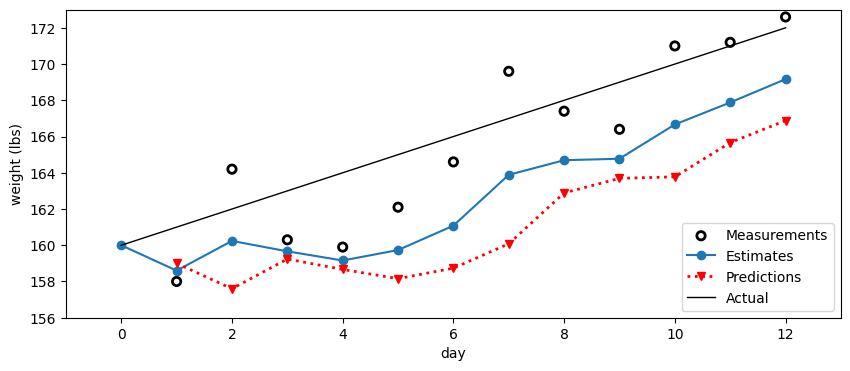

In [16]:
e, p = predict_using_gain_guess(estimated_weight=inital_estimate, gain_rate=-1.0, do_print=True)
gh.plot_gh_results(weights, e, p, [160, 172])

In [17]:
weight = 160.0
gain_rate = -1.0
time_step = 1 # day
weight_scale = 4.0/10
gain_scale = 1.0/3

estimates, predictions = [weight], []
# most filter use 'z' for measurements
for z in weights:
    # predict new postion
    weight = weight + gain_rate*time_step
    predictions.append(weight)

    # Update residual
    residual = z - weight
    # update filter
    gain_rate = gain_rate + gain_scale * residual/ time_step
    weight = weight + weight_scale*residual
    print("gain_rate", gain_rate)
    # save and log
    estimates.append(weight)



gain_rate -1.3333333333333333
gain_rate 0.977777777777779
gain_rate 0.7385185185185226
gain_rate 0.2154567901234543
gain_rate 0.5631341563785952
gain_rate 1.4173625240054832
gain_rate 3.1241120365797883
gain_rate 2.3734577319311163
gain_rate 0.7985792384982064
gain_rate 1.120792396272388
gain_rate 1.0071894921794355
gain_rate 1.0699645856638542


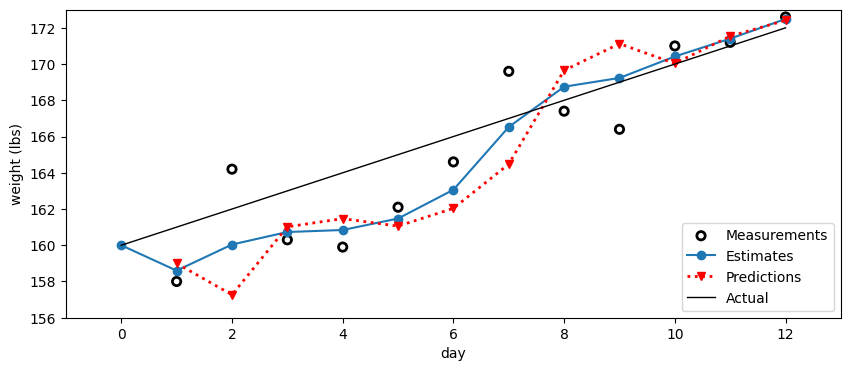

In [18]:
gh.plot_gh_results(weights, estimates, predictions, [160, 172])

Excersize: Write Generai Algorithm



In [23]:
def g_h_filter(data, x0, dx, g, h, dt):
    """
    Perfomrs g-h filter on state variable with a fixed g and h
    data: list-> data to be filtered
    x0: float -> init value for our state
    dx: float -> init change rate
    g: float -> scale factor for state
    h: float -> scale factor chagne rate
    dt: int -> time step 
    """
    ## Initialization
    x_est = x0
    results = []
    
    for z in data:
        ## Predict
        x_pred = x_est + dx*dt
        dx = dx
        
        ## Update
        res = z - x_pred
        dx = dx + h * res / dt
        x_est = x_pred + g * res
        results.append(x_est)
    return results



[158.0, 164.2, 160.3, 159.9, 162.1, 164.6, 169.6, 167.4, 166.4, 171.0, 171.2, 172.6]
[159.2        161.8        162.1        160.78       160.98533333
 163.31057778 168.10029037 169.69598183 168.20360386 169.1642501
 170.89234186 172.62868399]


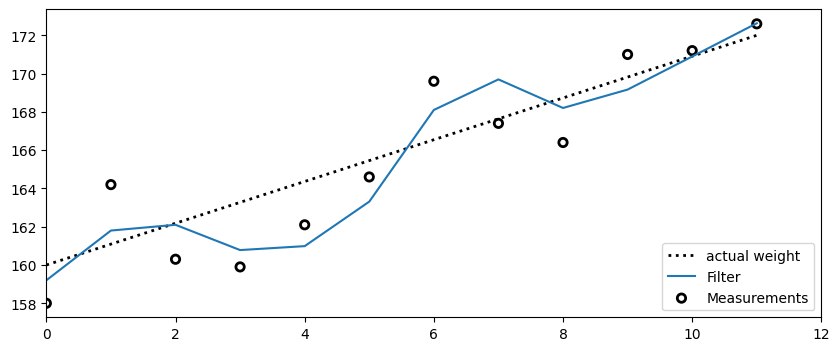

In [24]:

from kf_book.gh_internal import plot_g_h_results
book_plots.plot_track([0, 11], [160, 172], label='actual weight')
data = g_h_filter(data=weights, x0=160., dx=1.0, g=6.0/10, h=2.0/3, dt=1.0)
data = np.array(data)
plot_g_h_results(weights, data)

print(weights)
print(data)

Excercise: Create measurement function

In [25]:
import numpy as np 

def gen_data(x0, dx, numel, noise_factor):
    results = []
    for i in range(numel):
        x = x0 + dx*i + np.random.rand()*noise_factor
        results.append(x)
    return results

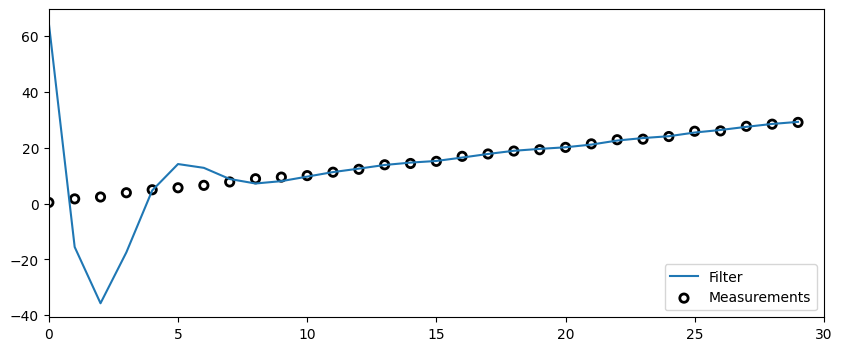

In [26]:
measurements = gen_data(0, 1, 30, 1)
data = g_h_filter(data=measurements, x0=160., dx=1.0, g=6.0/10, h=2.0/3, dt=1.0)
data = np.array(data)
plot_g_h_results(measurements, data)

Excersice: Bad Inital Condtion

In [27]:
numel = 100
x0=5
dx = 2.0
noise_factor = 10
g=0.2
h=0.02

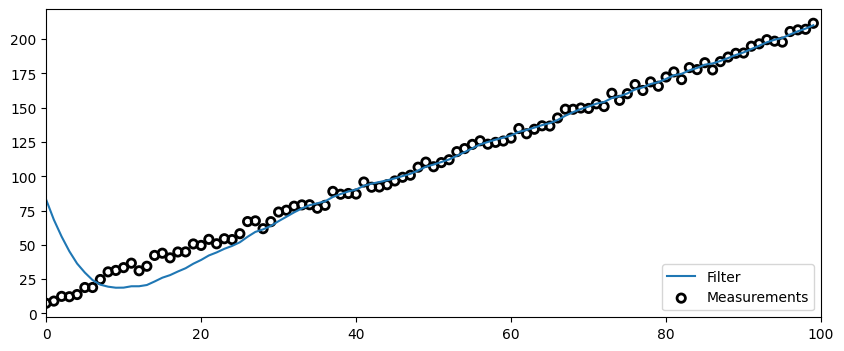

In [28]:
noisy_data = gen_data(x0, dx, numel, noise_factor)
data = g_h_filter(data=noisy_data, x0=100, dx=dx, g=g, h=h, dt=1.0)
data = np.array(data)
plot_g_h_results(noisy_data, data)

Excersize: Extreme noise

In [29]:
numel = 100
x0=5
dx = 2.0
noise_factor = 100
g=0.2
h=0.02

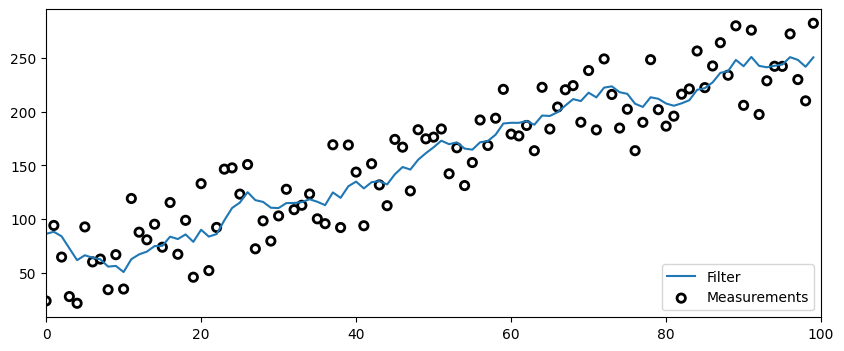

In [30]:
noisy_data = gen_data(x0, dx, numel, noise_factor)
data = g_h_filter(data=noisy_data, x0=100, dx=dx, g=g, h=h, dt=1.0)
data = np.array(data)
plot_g_h_results(noisy_data, data)

Excersice: Varying *g*

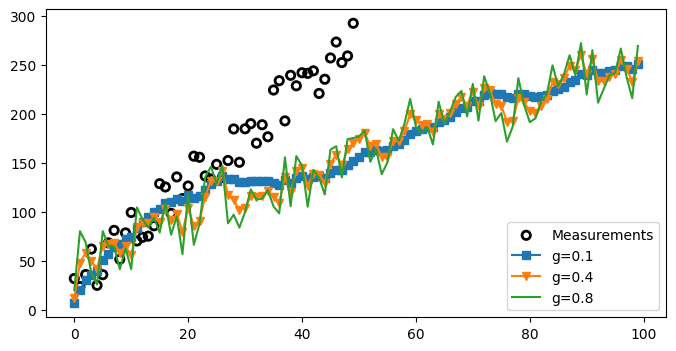

In [33]:
np.random.seed(100)
zs = gen_data(x0=5.0, dx=5.0, numel=50, noise_factor=50)

data1 = g_h_filter(data=noisy_data, x0=0., dx=5., g=0.1, h=0.01, dt=1.0)
data2 = g_h_filter(data=noisy_data, x0=0., dx=5., g=0.4, h=0.01, dt=1.0)
data3 = g_h_filter(data=noisy_data, x0=0., dx=5., g=0.8, h=0.01, dt=1.0)

with book_plots.figsize(y=4):
    book_plots.plot_measurements(zs, color='k')
    book_plots.plot_filter(data1, label='g=0.1', marker='s', c='C0')
    book_plots.plot_filter(data2, label='g=0.4', marker='v', c='C1')
    book_plots.plot_filter(data3, label='g=0.8', c='C2')
    plt.legend(loc=4)

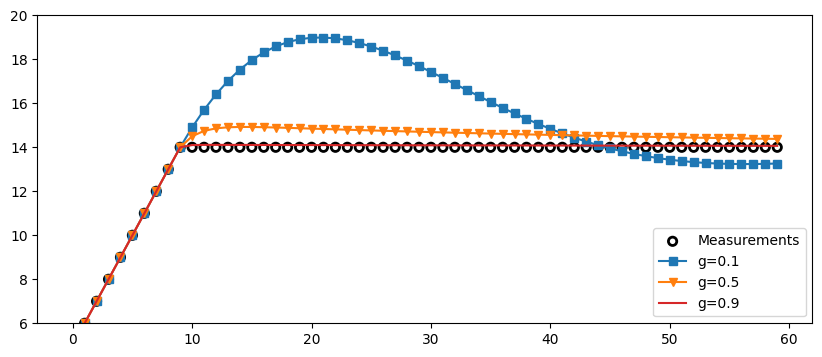

In [34]:
zs = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
for i in range(50):
    zs.append(14)

data1 = g_h_filter(data=zs, x0=4., dx=1., dt=1., g=0.1, h=0.01)
data2 = g_h_filter(data=zs, x0=4., dx=1., dt=1., g=0.5, h=0.01)
data3 = g_h_filter(data=zs, x0=4., dx=1., dt=1., g=0.9, h=0.01)

book_plots.plot_measurements(zs)
book_plots.plot_filter(data1, label='g=0.1', marker='s', c='C0')
book_plots.plot_filter(data2, label='g=0.5', marker='v', c='C1')
book_plots.plot_filter(data3, label='g=0.9', c='C3')
plt.legend(loc=4)
plt.ylim([6, 20]);

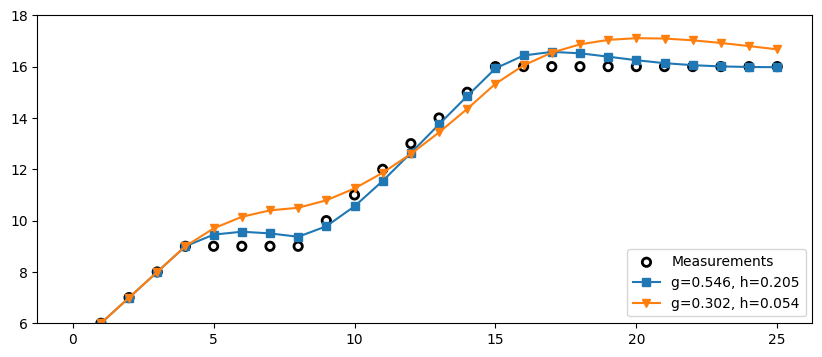

In [35]:

zs = [5,6,7,8,9,9,9,9,9,10,11,12,13,14,
      15,16,16,16,16,16,16,16,16,16,16,16]
data1 = g_h_filter(data=zs, x0=4., dx=1., dt=1., g=.302, h=.054)
data2 = g_h_filter(data=zs, x0=4., dx=1., dt=1., g=.546, h=.205)

book_plots.plot_measurements(zs)
book_plots.plot_filter(data2, label='g=0.546, h=0.205', marker='s', c='C0')
book_plots.plot_filter(data1, label='g=0.302, h=0.054', marker='v', c='C1')
plt.legend(loc=4)
plt.ylim([6, 18]);

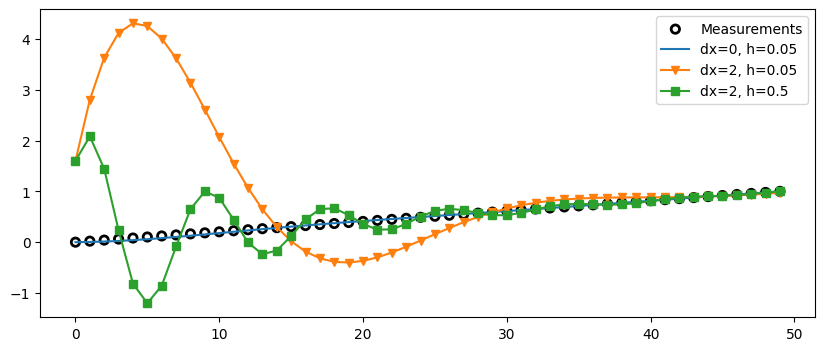

In [36]:
zs = np.linspace(0, 1, 50)

data1 = g_h_filter(data=zs, x0=0, dx=0., dt=1., g=.2, h=0.05)
data2 = g_h_filter(data=zs, x0=0, dx=2., dt=1., g=.2, h=0.05)
data3 = g_h_filter(data=zs, x0=0, dx=2., dt=1., g=.2, h=0.5)

book_plots.plot_measurements(zs)
book_plots.plot_filter(data1, label='dx=0, h=0.05', c='C0')
book_plots.plot_filter(data2, label='dx=2, h=0.05', marker='v', c='C1')
book_plots.plot_filter(data3, label='dx=2, h=0.5',  marker='s', c='C2')
plt.legend(loc=1);

In [38]:
from ipywidgets import interact

# my FloatSlider returns an ipywidgets.FloatSlider with
# continuous_update=False. Filtering code runs too slowly
# to instantly react to slider changes.
from kf_book.book_plots import FloatSlider

zs1 = gen_data(x0=5, dx=5., numel=100, noise_factor=50)

fig = None
def interactive_gh(x, dx, g, h):
    global fig
    if fig is not None: plt.close(fig)
    fig = plt.figure()
    data = g_h_filter(data=zs1, x0=x, dx=dx, g=g, h=h)
    plt.scatter(range(len(zs1)), zs1, edgecolor='k', 
                facecolors='none', marker='o', lw=1)
    plt.plot(data, color='b')
    plt.show()

interact(interactive_gh,           
         x=FloatSlider(value=0, min=-200, max=200), 
         dx=FloatSlider(value=5, min=-50, max=50), 
         g=FloatSlider(value=.1, min=.01, max=2, step=.02), 
         h=FloatSlider(value=.02, min=.0, max=.5, step=.01));

TypeError: g_h_filter() missing 1 required positional argument: 'dt'

<Figure size 1000x400 with 0 Axes>

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='x', max=200.0, min=-200.0),…